In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fft, fftfreq

path = './EMG_Datasets/EMG_Datasets.csv'
dataset = pd.read_csv(path)

# Bandstop and Bandpass filters

relaxedData= dataset['EMG_Relaxed (mV)'].to_numpy()
contractData = dataset['EMG_Contracted (mV)'].to_numpy()
time = dataset['Time (s)'].to_numpy()
x = np.linspace(0,10,len(contractData))

order = 8
fs = 1 / ( time[1] - time[0] )
frequencies_bandpass = [0.1, 450]
frequencies_stop = [57, 63]

sos_bandpass = signal.butter(order, frequencies_bandpass, btype='pass', fs = fs, output='sos')
sos_stop = signal.butter(order, frequencies_stop, btype='stop', fs = fs, output='sos')

datasets = [contractData, relaxedData]
filtered_data = []

for data in datasets:
    databpf = signal.sosfilt(sos_bandpass, data)
    databpf_filtered = signal.sosfilt(sos_stop, databpf)
    filtered_data.append(databpf_filtered)

databpfOne, databpfThree = filtered_data

N = len(contractData)
yf = (2/N) * np.abs(fft(contractData)) 
databpf_f = (2/N) * np.abs(fft(databpfOne))

xf = fftfreq(N,1/fs) # ts = 1/fs is the 0.1
yf = yf[0:N//2]
databpf_f = databpf_f[0:N//2]

yfr = (2/N) * np.abs(fft(relaxedData)) 
databpf_fOne = (2/N) * np.abs(fft(databpfThree))
yfr = yfr[0:N//2]
databpf_fOne = databpf_fOne[0:N//2]

xf = xf[0:N//2]

data_contracted = list(zip(xf, databpf_f))
data_relaxed = list(zip(xf, databpf_fOne))

print(len(xf))
print(len(yf))
print(len(databpf_f))
print(len(databpf_fOne))


5120
5120
5120
5120


In [ ]:
# Transfer functions of both signals
z,p,k = signal.butter(8, frequencies_bandpass, btype='pass', fs = fs, output='zpk')

numerator = np.poly(z)  
denominator = np.poly(p)  

num_str = " * ".join([f"(s - ({zi.real:.4f} + {zi.imag:.4f}j))" for zi in z])
denom_str = " * ".join([f"(s - ({pi.real:.4f} + {pi.imag:.4f}j))" for pi in p])
transfer_function_strbp = f"H(s) = {k:.4e} * ({num_str}) / ({denom_str})"

print("Transfer Function BandPass:")
print(transfer_function_strbp)

print("Band pass zeros, poles and gain: ",z,", ", p,", ",k, "\n")

z,p,k = signal.butter(8, frequencies_stop, btype='stop', fs = fs, output='zpk')

numerator = np.poly(z) 
denominator = np.poly(p)  

num_str = " * ".join([f"(s - ({zi.real:.4f} + {zi.imag:.4f}j))" for zi in z])
denom_str = " * ".join([f"(s - ({pi.real:.4f} + {pi.imag:.4f}j))" for pi in p])
transfer_function_strbs = f"H(s) = {k:.4e} * ({num_str}) / ({denom_str})"

print("Transfer Function BandStop:")
print(transfer_function_strbs)

print("Band Stop zeros, poles and gain: ",z,", ", p,", ",k ,"\n")


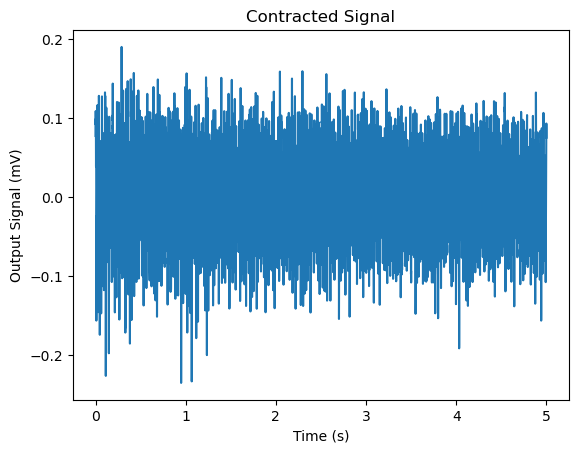

In [2]:
# plt.subplot(1,4,1)
plt.plot(time,contractData)
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Contracted Signal')
plt.show()

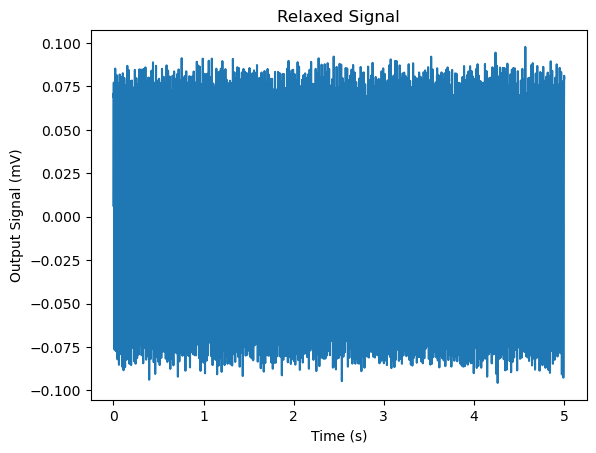

In [3]:
# plt.subplot(1,4,2)
plt.plot(time, relaxedData)
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Relaxed Signal')
plt.show()


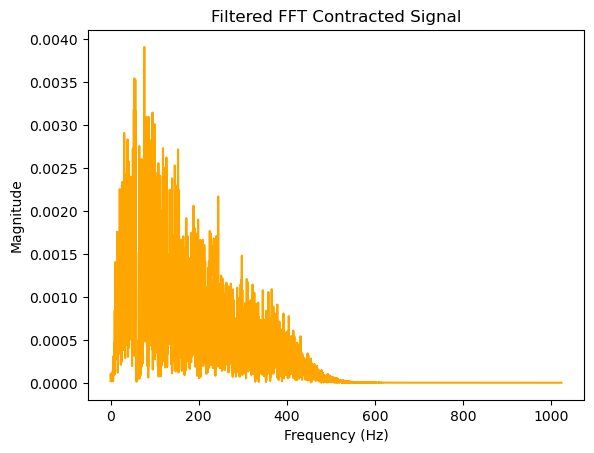

In [4]:
# plt.subplot(1,4,3)
plt.plot(xf,databpf_f, color = 'orange')
# plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Filtered FFT Contracted Signal')
plt.show()

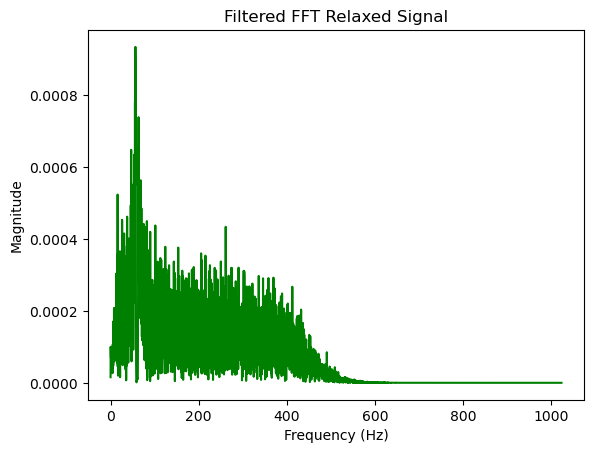

In [5]:
# plt.subplot(1,4,4)
plt.plot(xf,databpf_fOne, color = 'green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Filtered FFT Relaxed Signal')
plt.show()


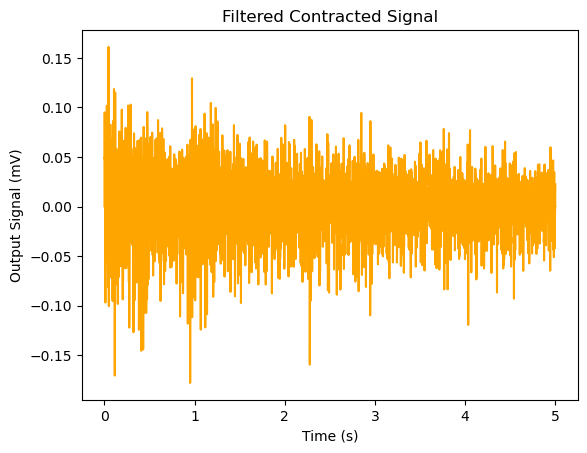

In [6]:
plt.plot(time,databpfOne, color = 'orange')
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Filtered Contracted Signal')
plt.show()

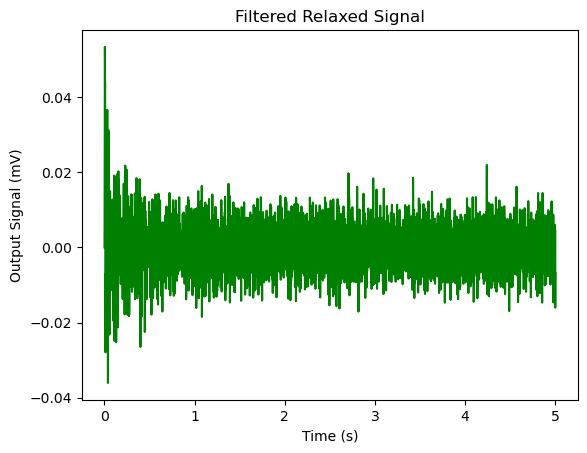

In [7]:
plt.plot(time,databpfThree,color = 'green')
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Filtered Relaxed Signal')
plt.show()

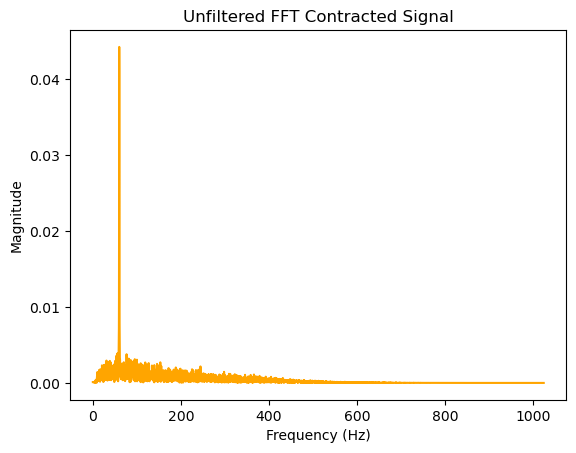

In [8]:
plt.plot(xf ,yf, color = 'orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Unfiltered FFT Contracted Signal')
plt.show()

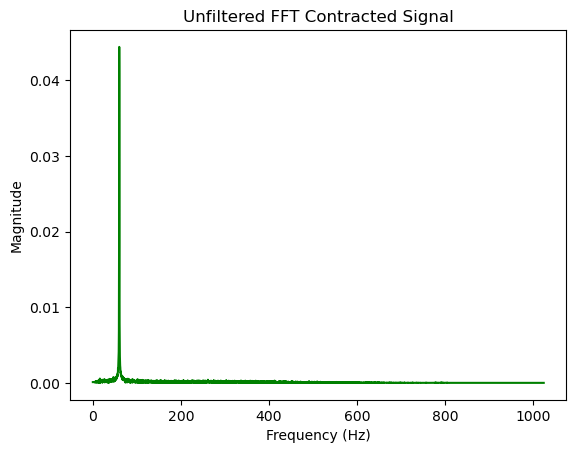

In [9]:
plt.plot(xf ,yfr, color = 'green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Unfiltered FFT Contracted Signal')
plt.show()

In [14]:
dataset = pd.read_csv(path)

def RMS(emgData):
    return np.sqrt((np.mean((emgData ** 2))))

relaxedEMG = dataset['EMG_Relaxed (mV)']
contractEMG = dataset['EMG_Contracted (mV)']

relaxedRMS = RMS(relaxedEMG)
contractedRMS = RMS(contractEMG)

contractFilterRMS = RMS(databpfOne)
relaxedFilterRMS = RMS(databpfThree)

# plotting the relaxed EMG

print("RMS of Contracted Signal: ", contractedRMS)
print("RMS of relaxed Signal: ", relaxedRMS)
print("RMS of filtered Contracted Signal: ", contractFilterRMS)
print("RMS of filtered relaxed Signal: ", relaxedFilterRMS)


RMS of Contracted Signal:  0.06450462217796574
RMS of relaxed Signal:  0.056802758311347
RMS of filtered Contracted Signal:  0.030965523736238443
RMS of filtered relaxed Signal:  0.005995376836538449
